In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
df = pd.read_csv('Financial Analytics data.csv')
df.head()

,S.No.,Company Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [3]:
df.shape

(488, 4)

### Dropping Useless Colunms

In [4]:
df.drop(columns = ['S.No.'], inplace=True)
df.head()

,Company Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


### Changing Column names for better understanding

In [5]:
df.rename(columns = {
    'Company Name': 'Name',
    'Mar Cap - Crore': 'MarketCap_Crore',
    'Sales Qtr - Crore': 'SalesQuater_Crore'
}, inplace=True)

df.head()

,Name,MarketCap_Crore,SalesQuater_Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


### Checking for Duplicate Values

In [6]:
print(f'Number of Duplicate Values in the Dataset: {df.duplicated().sum()}')

Number of Duplicate Values in the Dataset: 0


### Checking for Null Values

In [7]:
print(f'Number of Null Values in the Dataset:\n{df.isna().sum()}')

Number of Null Values in the Dataset:
Name                  0
MarketCap_Crore       9
SalesQuater_Crore    29
dtype: int64


<AxesSubplot:>

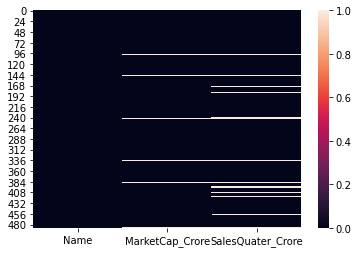

In [8]:
sns.heatmap(df.isna())

### Handling Null Values (Median)
    - Outliers
        Mean: Heavily influenced by extreme values (outliers), making it less representative of the data.
        Median: Unaffected by outliers, providing a more robust measure of central tendency.
        
    - Skewed Distributions
        Mean: Can be misleading in skewed distributions as it gets pulled towards the skew.
        Median: Unaffected by skewness, better representing the central location of the data.

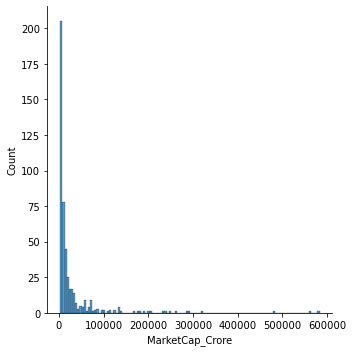

In [9]:
sns.displot(df['MarketCap_Crore'])

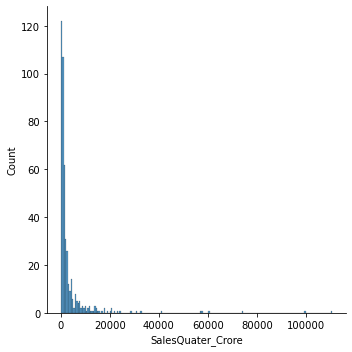

In [10]:
sns.displot(df['SalesQuater_Crore'])

In [11]:
df['MarketCap_Crore'].fillna(df['MarketCap_Crore'].median(), inplace=True)
df['SalesQuater_Crore'].fillna(df['SalesQuater_Crore'].median(), inplace=True)

In [12]:
df.isna().sum()

Name                 0
MarketCap_Crore      0
SalesQuater_Crore    0
dtype: int64

<AxesSubplot:>

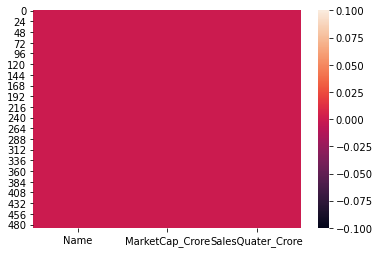

In [13]:
sns.heatmap(df.isna())

# Data Visualization

### Top-7 and Bottom-7 Companies (Market Capitalization) 

In [14]:
# MarketCap_Crore top 7
top_7_df = df.nlargest(7, 'MarketCap_Crore')
top_7_df[['Name', 'MarketCap_Crore']]

,Name,MarketCap_Crore
0,Reliance Inds.,583436.72
1,TCS,563709.84
2,HDFC Bank,482953.59
3,ITC,320985.27
4,H D F C,289497.37
5,Hind. Unilever,288265.26
6,Maruti Suzuki,263493.81


In [15]:
# MarketCap_Crore smallest 7
bottom_7_df = df.nsmallest(7, 'MarketCap_Crore').sort_values(by='MarketCap_Crore', ascending=False)
bottom_7_df[['Name', 'MarketCap_Crore']]

,Name,MarketCap_Crore
480,Deepak Fert.,3079.06
481,Va Tech Wabag,3041.93
482,Prime Focus,3031.50
483,Lak. Vilas Bank,3029.57
484,NOCIL,3026.26
485,Orient Cement,3024.32
486,Natl.Fertilizer,3017.07


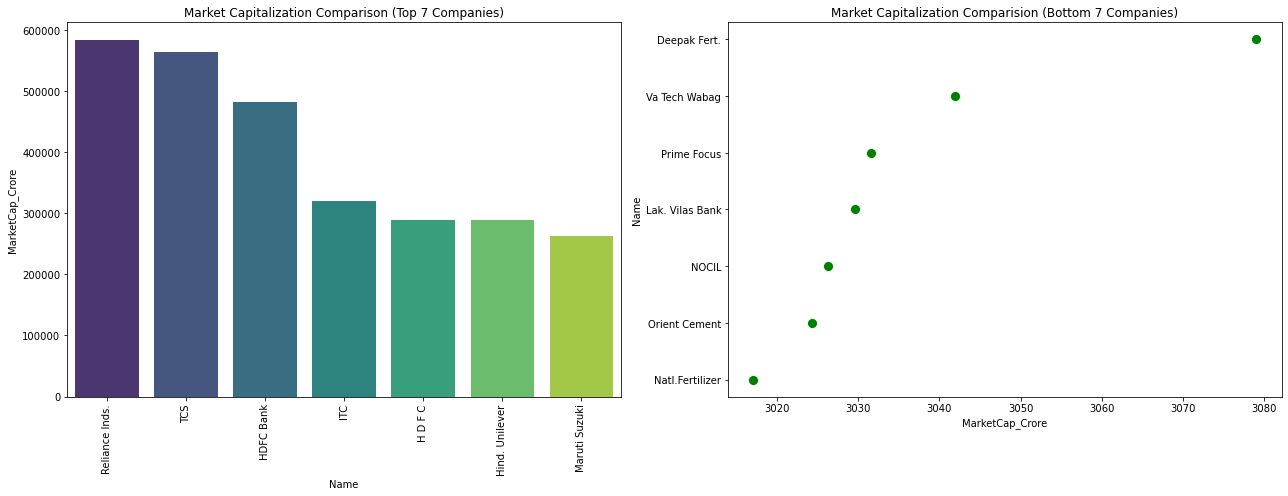

In [16]:
# Two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

# Top 7 Market Capitalization
sns.barplot(x='Name', y='MarketCap_Crore', data=top_7_df, ax=axes[0], palette='viridis')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Market Capitalization Comparison (Top 7 Companies)')

# Smallest 7 Market Capitalization
sns.scatterplot(x='MarketCap_Crore', y='Name', data=bottom_7_df, color='green', s=100, ax=axes[1])
axes[1].set_title('Market Capitalization Comparision (Bottom 7 Companies)')
axes[1].set_xlabel('MarketCap_Crore')

plt.tight_layout()
plt.show()

### Top-7 and Bottom-7 Companies (Sales Quater) 

In [17]:
# SalesQuater_Crore top 7
top_7_df = df.nlargest(7, 'SalesQuater_Crore')
top_7_df[['Name', 'SalesQuater_Crore']]

,Name,SalesQuater_Crore
14,I O C L,110666.93
0,Reliance Inds.,99810.00
23,Tata Motors,74156.07
27,B P C L,60616.36
54,H P C L,57474.25
9,St Bk of India,57014.08
122,Rajesh Exports,41304.84


In [18]:
# SalesQuater_Crore smallest 7
bottom_7_df = df.nsmallest(7, 'SalesQuater_Crore').sort_values(by='SalesQuater_Crore', ascending=False)
bottom_7_df[['Name', 'SalesQuater_Crore']]

,Name,SalesQuater_Crore
373,Indian Energy Ex,64.75
388,Forbes & Co,63.93
422,Multi Comm. Exc.,60.97
467,Central Dep. Ser,47.24
382,Tata Inv.Corpn.,47.02
228,SPARC,19.42
393,Ujjivan Fin.Ser.,0.00


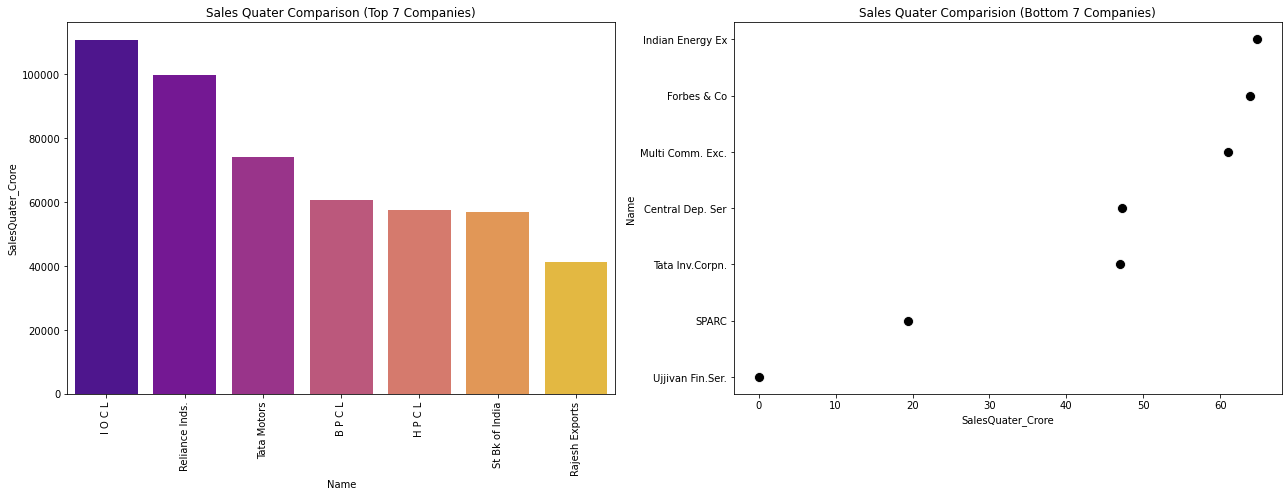

In [19]:
# Two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

# Top 7 Sales Quater
sns.barplot(x='Name', y='SalesQuater_Crore', data=top_7_df, ax=axes[0], palette='plasma')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Sales Quater Comparison (Top 7 Companies)')

# Smallest 7 Sales Quater
sns.scatterplot(x='SalesQuater_Crore', y='Name', data=bottom_7_df, color='black', s=100, ax=axes[1])
axes[1].set_title('Sales Quater Comparision (Bottom 7 Companies)')
axes[1].set_xlabel('SalesQuater_Crore')

plt.tight_layout()
plt.show()

### Market Capitalization vs. Quarterly Sales

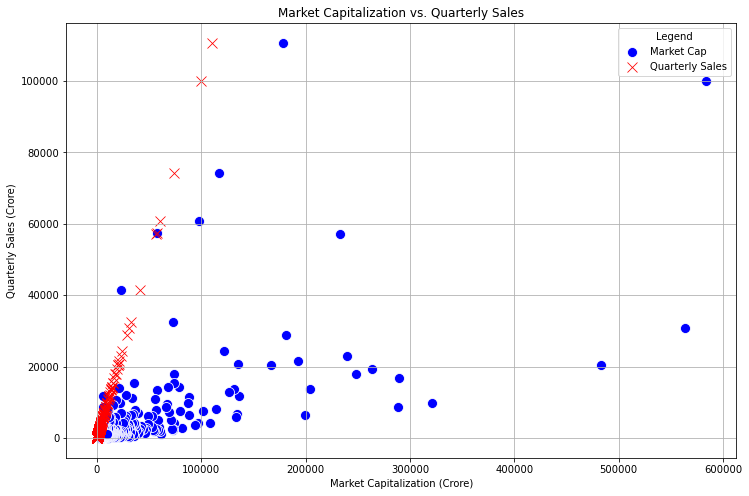

In [20]:
plt.figure(figsize=(12, 8))

# Plot Market Capitalization
sns.scatterplot(x='MarketCap_Crore', y='SalesQuater_Crore', data=df,
                color='blue', label='Market Cap', marker='o', s=100)

# Plot Sales
sns.scatterplot(x='SalesQuater_Crore', y='SalesQuater_Crore', data=df,
                color='red', label='Quarterly Sales', marker='x', s=100)

# MetaData
plt.title('Market Capitalization vs. Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.legend(title='Legend')
plt.grid(True)

# Show plot
plt.show()

### Adding a new column named 'MarketCap_Sales_Ratio' to the dataframe 
    - Formula:
        MarketCap Sales Ratio = Market Cap/ Quaterly Sales 
    - This ratio provides insight into the profitability of our investment in the company or its stock.

In [21]:
# Create a new column for the ratio of Market Cap to Sales
df['MarketCap_Sales_Ratio'] = df['MarketCap_Crore'] / df['SalesQuater_Crore']
df

,Name,MarketCap_Crore,SalesQuater_Crore,MarketCap_Sales_Ratio
0,Reliance Inds.,583436.72,99810.00,5.845474
1,TCS,563709.84,30904.00,18.240676
2,HDFC Bank,482953.59,20581.27,23.465685
3,ITC,320985.27,9772.02,32.847382
4,H D F C,289497.37,16840.51,17.190535
...,...,...,...,...
483,Lak. Vilas Bank,3029.57,790.17,3.834074
484,NOCIL,3026.26,249.27,12.140490
485,Orient Cement,3024.32,511.53,5.912302
486,Natl.Fertilizer,3017.07,2840.75,1.062068


### Top-10 Good Investment and Top-10 Bad Investment Companies (MarketCap Sales Ratio) 
       - Good: Good Investment Companies currently
       - Bad: Bad Investment Companies currently

In [22]:
# MarketCap Sales Ratio Top-10 Good Investment Companies currently
good_inv_df = df.nsmallest(10, 'MarketCap_Sales_Ratio')
good_inv_df[['Name', 'MarketCap_Sales_Ratio']]

,Name,MarketCap_Sales_Ratio
320,Redington India,0.502757
122,Rajesh Exports,0.568833
334,C P C L,0.632085
441,Corporation Bank,0.846989
444,Oriental Bank,0.862161
410,Andhra Bank,0.894047
405,Allahabad Bank,0.974853
54,H P C L,1.009753
486,Natl.Fertilizer,1.062068
316,Syndicate Bank,1.132228


In [23]:
# MarketCap Sales Ratio Top-10 Bad Investment Companies currently
bad_inv_df = df.nlargest(10, 'MarketCap_Sales_Ratio')
bad_inv_df[['Name', 'MarketCap_Sales_Ratio']]

,Name,MarketCap_Sales_Ratio
393,Ujjivan Fin.Ser.,inf
228,SPARC,553.817199
95,Bajaj Holdings,95.346673
382,Tata Inv.Corpn.,93.612505
373,Indian Energy Ex,70.976062
467,Central Dep. Ser,70.201312
388,Forbes & Co,67.758799
422,Multi Comm. Exc.,63.099721
245,Delta Corp,58.775174
239,ERIS Lifescience,56.472257


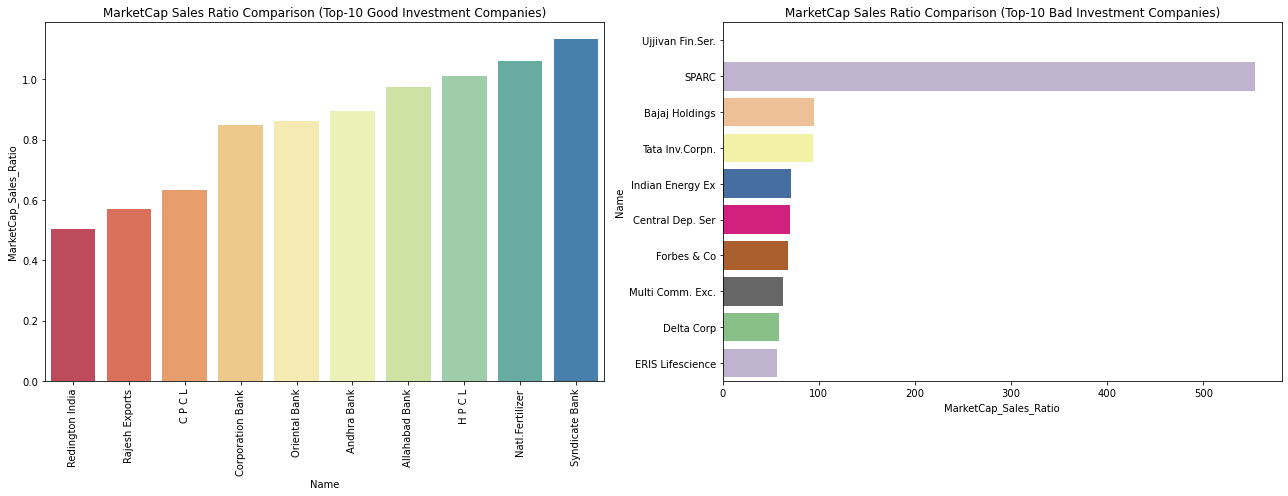

In [24]:
# Two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

# Top-10 Good Investment Companies currently
sns.barplot(x='Name', y='MarketCap_Sales_Ratio', data=good_inv_df, ax=axes[0], palette='Spectral')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('MarketCap Sales Ratio Comparison (Top-10 Good Investment Companies)')

# Top-10 Bad Investment Companies currently
sns.barplot(x='MarketCap_Sales_Ratio', y='Name', data=bad_inv_df, ax=axes[1], palette='Accent')
axes[1].set_title('MarketCap Sales Ratio Comparison (Top-10 Bad Investment Companies)')
axes[1].set_xlabel('MarketCap_Sales_Ratio')

plt.tight_layout()
plt.show()